In [67]:
import numpy as np
x = np.array([10,11,12,13,14,15,16,17,18,19])
print(len(x))
print(x)
np.arange(len(x))
indexs = np.random.permutation(np.arange(len(x)))
print(indexs)
for i in indexs:
    print(x[i], end=' ')

10
[10 11 12 13 14 15 16 17 18 19]
[9 4 6 3 1 8 5 2 7 0]
19 14 16 13 11 18 15 12 17 10 

In [101]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [102]:
class SingleLayer():
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexs = np.random.permutation(np.arange(len(x)))
            for i in indexs:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [103]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

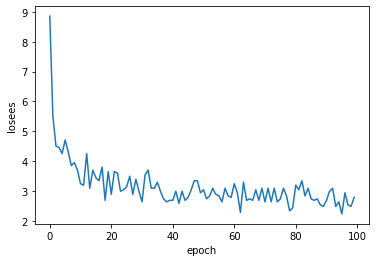

In [104]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('losees')
plt.show()

In [105]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all , test_size=0.2, random_state=42)

print('Train shape: {}'.format(x_train.shape), 'Val shape: {}'.format(x_val.shape), 'Test shape: {}'.format(x_test.shape), sep='\n')

Train shape: (364, 30)
Val shape: (91, 30)
Test shape: (114, 30)


['mean perimeter' 'mean area']


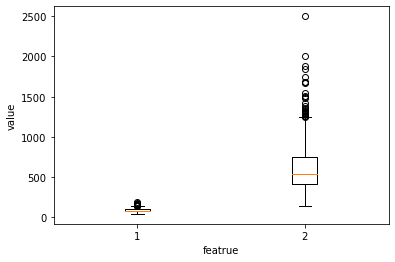

In [106]:
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('featrue')
plt.ylabel('value')
plt.show()

In [107]:
class SingleLayer():
    def __init__(self, learning_rate=0.01):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.lr = learning_rate
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexs = np.random.permutation(np.arange(len(x)))
            for i in indexs:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= self.lr * w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [108]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_test, y_test)

0.9298245614035088

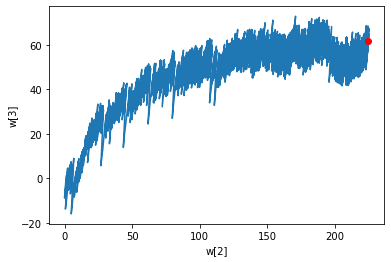

In [109]:
w2 = []
w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [110]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean)/train_std

In [111]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)

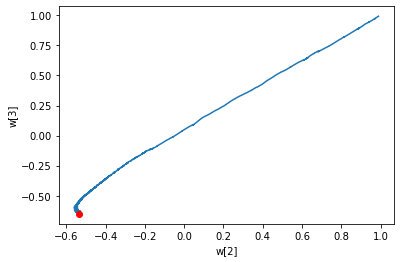

In [112]:
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [113]:
layer2.score(x_train_scaled, y_train)

0.989010989010989

In [114]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.978021978021978

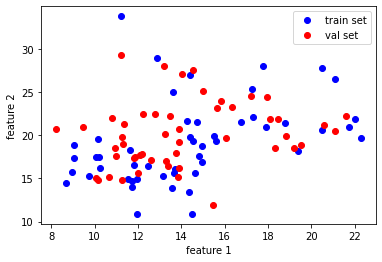

In [115]:
plt.plot(x_train[:50,0], x_train[:50,1], 'bo')
plt.plot(x_val[:50,0], x_val[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val set'])
plt.show()

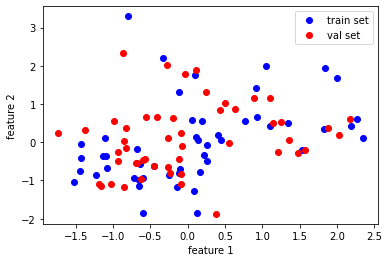

In [116]:
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val set'])
plt.show()

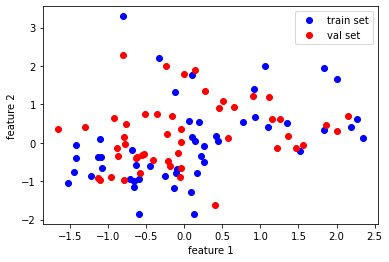

In [117]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val set'])
plt.show()

In [118]:
layer2.score(x_val_scaled, y_val)

0.978021978021978

---
* 과대적합 : 훈련 세트에서 좋은 성능을 내지만 검증 세트에서는 낮은 성능을 내는 경우
* 과소적합 : 훈련 세트와 검증세트의 성능에는 차이가 크지 않지만 모두 낮은 성을을 내는 경우

In [123]:
class SingleLayer():
    def __init__(self, learning_rate=0.01):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.lr = learning_rate
        self.val_losses = []
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexs = np.random.permutation(np.arange(len(x)))
            for i in indexs:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= self.lr * w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
            self.update_val_loss(x_val, y_val)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))
        
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

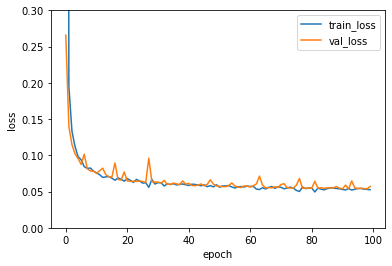

In [128]:
# 훈련 조기 종료
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [129]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=40)
layer4.score(x_val_scaled, y_val)

0.978021978021978

In [131]:
# L1 규제 적용하기
class SingleLayer():
    def __init__(self, learning_rate=0.01, l1=0):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.lr = learning_rate
        self.val_losses = []
        self.l1 = l1
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexs = np.random.permutation(np.arange(len(x)))
            for i in indexs:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad, b_grad = self.backprop(x[i], err)
                w_grad += self.l1 * np.sign(self.w)
                self.w -= self.lr * w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y) + self.reg_loss())
            self.update_val_loss(x_val, y_val)
            
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w))
        
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))
        
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

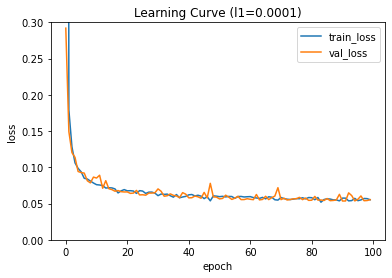

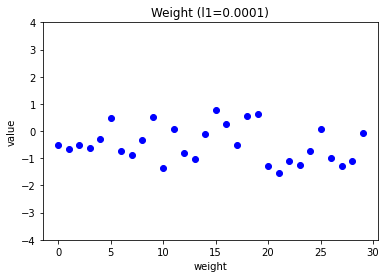

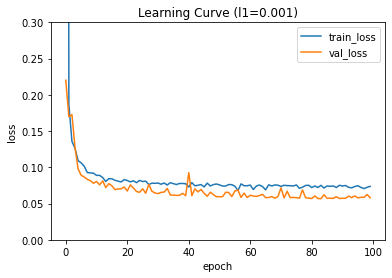

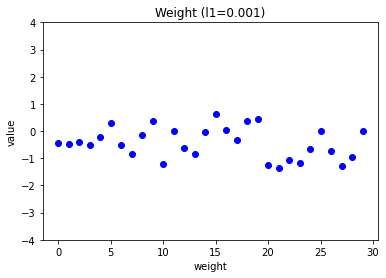

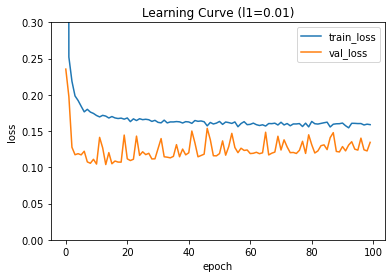

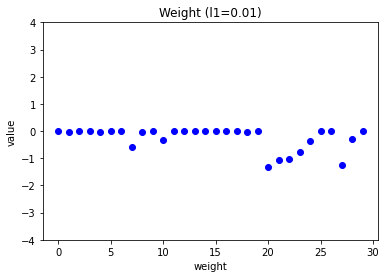

In [133]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
    lyr = SingleLayer(l1=l1)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

In [134]:
# L2 규제 적용하기
class SingleLayer():
    def __init__(self, learning_rate=0.01, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.lr = learning_rate
        self.val_losses = []
        self.l1 = l1
        self.l2 = l2
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexs = np.random.permutation(np.arange(len(x)))
            for i in indexs:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad, b_grad = self.backprop(x[i], err)
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y) + self.reg_loss())
            self.update_val_loss(x_val, y_val)
            
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w) + self.l2 / 2 *np.sum(self.w**2))
        
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))
        
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

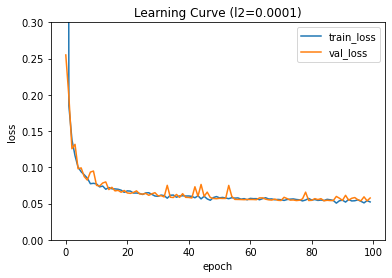

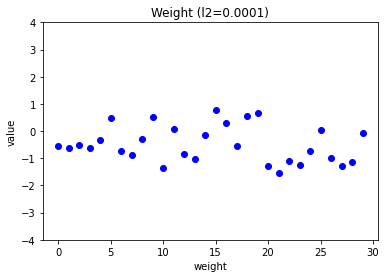

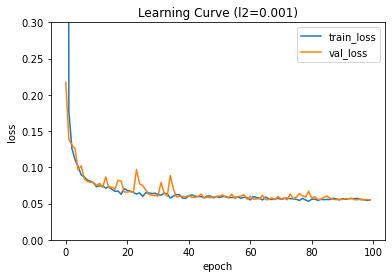

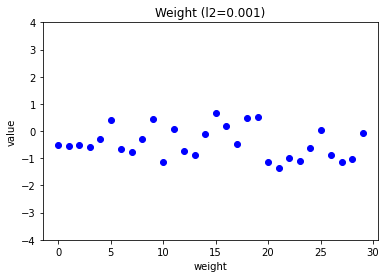

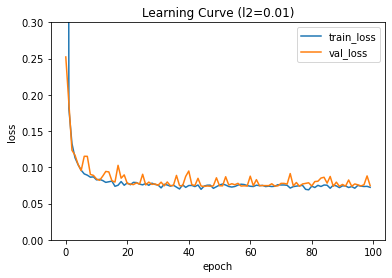

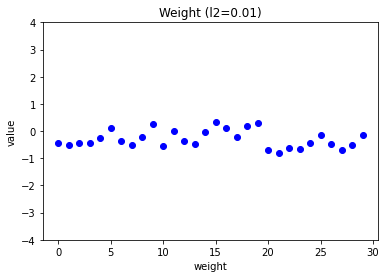

In [135]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
    lyr = SingleLayer(l2=l2)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()